# Image Processing in OpenCV

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html

## Import Modules

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Changing Colorspaces
Please check the code: `py/blue_object.py`
Press ESC key to quit.

In [40]:
!python3 py/blue_object.py

In [1]:
!cat py/blue_object.py

import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

# Geometric Transformations of Images

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations

## Scaling

In [2]:
img = cv2.imread('img/messi5.jpg')

In [3]:
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

or

In [4]:
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

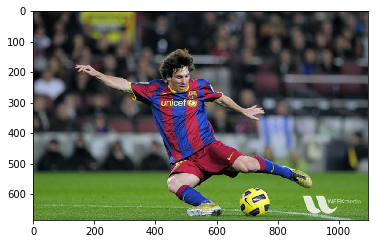

In [5]:
res2 = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(res2)

## Affine Transformation

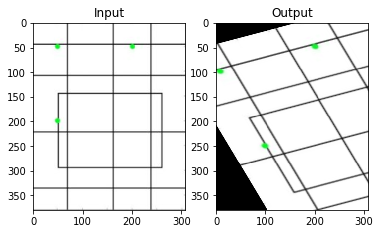

In [6]:
img = cv2.imread('img/drawing.png')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Perspective Transformation

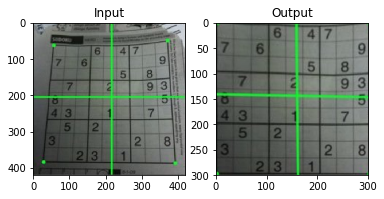

In [7]:
img = cv2.imread('img/sudokusmall.png')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# Image Thresholding

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html#thresholding

## Simple Thresholding

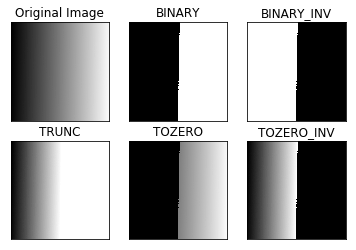

In [8]:
img = cv2.imread('img/gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## Adaptive Thresholding

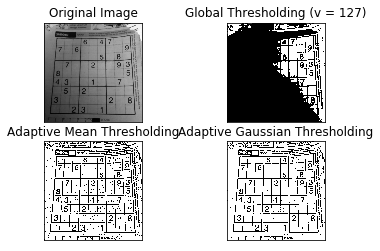

In [9]:
img = cv2.imread('img/sudoku.png',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Otsu’s Binarization

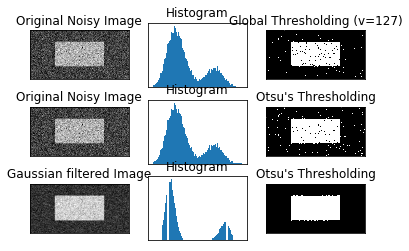

In [10]:
img = cv2.imread('img/noisy.jpg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# Smoothing Images

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html#filtering

## 2D Convolution ( Image Filtering )

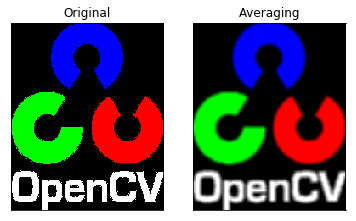

In [11]:
img = cv2.imread('img/opencv-logo-white.png')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## Image Blurring (Image Smoothing)

### 1. Averaging

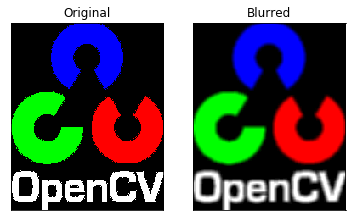

In [12]:
img = cv2.imread('img/opencv-logo-white.png')

blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 2. Gaussian Filtering

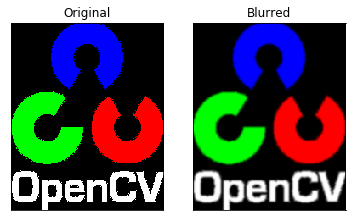

In [13]:
blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 3. Median Filtering

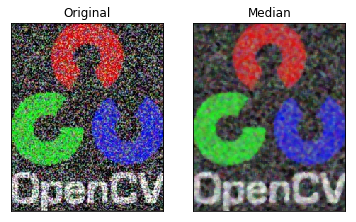

In [14]:
img = cv2.imread('img/opencv-logo-white-noisy.png')

median = cv2.medianBlur(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.show()

### 4. Bilateral Filtering

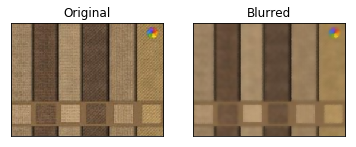

In [15]:
img = cv2.imread('img/texture.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blur = cv2.bilateralFilter(img,9,75,75)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

Note that the texture on the surface is gone, but edges are still preserved.

# Morphological Transformations

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html#morphological-ops

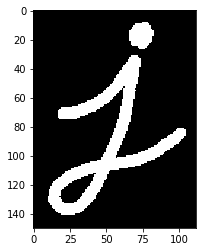

In [16]:
img = cv2.imread('img/j.png',0) # Load an color image in grayscale
plt.imshow(img, cmap = 'gray')

## 1. Erosion

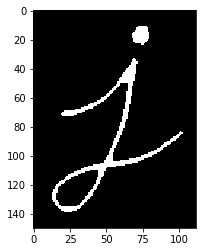

In [17]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(erosion, cmap = 'gray')

## 2. Dilation

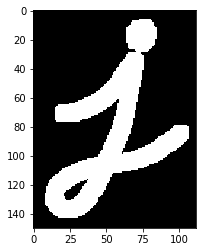

In [18]:
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation, cmap = 'gray')

## 3. Opening

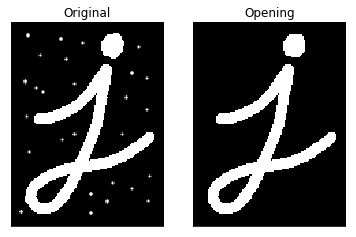

In [19]:
img = cv2.imread('img/opening.png')

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening),plt.title('Opening')
plt.xticks([]), plt.yticks([])
plt.show()

## 4. Closing

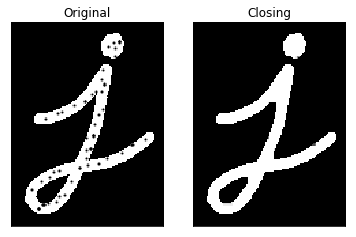

In [20]:
img = cv2.imread('img/closing.png')

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing),plt.title('Closing')
plt.xticks([]), plt.yticks([])
plt.show()

# Image Gradients

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html#gradients

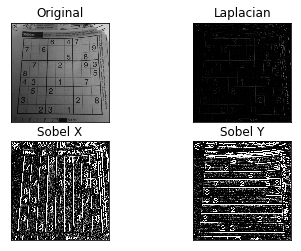

True

In [21]:
img = cv2.imread('img/sudoku.png',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray', vmin = 0, vmax = 255)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray', vmin = 0, vmax = 255)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray', vmin = 0, vmax = 255)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray', vmin = 0, vmax = 255)
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()
cv2.imwrite('laplacian.png', laplacian)

# Canny Edge Detection

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html#canny

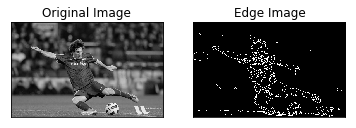

True

In [22]:
img = cv2.imread('img/messi5.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()
cv2.imwrite('edges.png', edges)

# Histogram Equalization

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html#histogram-equalization

## Theory

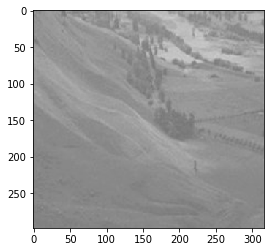

In [23]:
img = cv2.imread('img/wiki.png',0)
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)

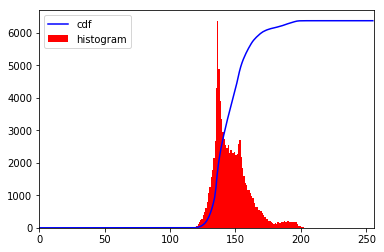

In [24]:
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

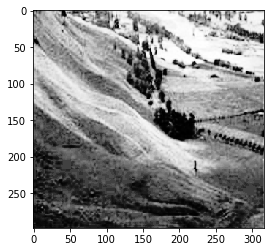

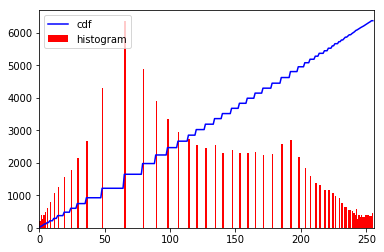

In [25]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

plt.imshow(img2, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

hist,bins = np.histogram(img2.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Histograms Equalization in OpenCV

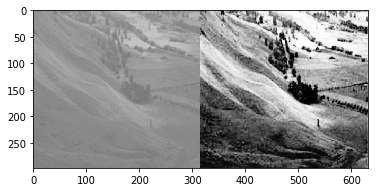

In [26]:
img = cv2.imread('img/wiki.png',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.imshow(res, cmap = 'gray', vmin = 0, vmax = 255)

## CLAHE (Contrast Limited Adaptive Histogram Equalization)

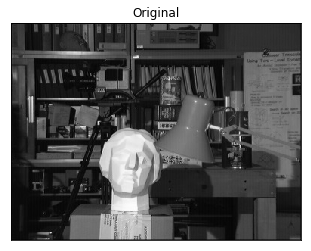

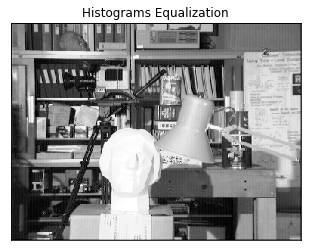

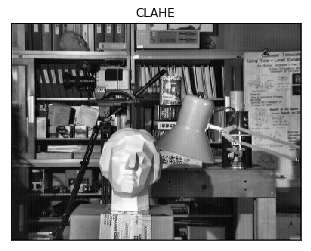

In [27]:
img = cv2.imread('img/tsukuba.jpg',0)

# Histograms Equalization
equ = cv2.equalizeHist(img)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(equ, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Histograms Equalization')
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(cl1, cmap = 'gray', vmin = 0, vmax = 255),plt.title('CLAHE')
plt.xticks([]), plt.yticks([])
plt.show()

# Contour Features

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html#contour-features

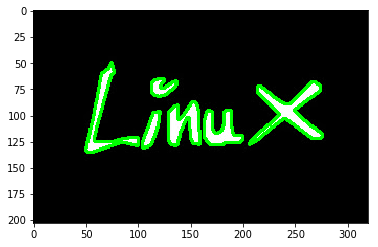

In [28]:
img = cv2.imread('img/LinuxLogo.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img2 = cv2.imread('img/LinuxLogo.jpg')
img2 = cv2.drawContours(img2, contours, -1, (0,255,0), 2)

plt.imshow(img2)
plt.show()

In [29]:
contours

[array([[[119,  96]],
 
        [[118,  97]],
 
        [[115,  97]],
 
        [[114,  98]],
 
        [[114, 100]],
 
        [[113, 101]],
 
        [[113, 102]],
 
        [[112, 103]],
 
        [[112, 105]],
 
        [[111, 106]],
 
        [[111, 108]],
 
        [[110, 109]],
 
        [[110, 111]],
 
        [[109, 112]],
 
        [[109, 113]],
 
        [[108, 114]],
 
        [[108, 116]],
 
        [[107, 117]],
 
        [[107, 118]],
 
        [[106, 119]],
 
        [[106, 121]],
 
        [[105, 122]],
 
        [[105, 124]],
 
        [[104, 125]],
 
        [[104, 131]],
 
        [[106, 131]],
 
        [[107, 130]],
 
        [[109, 130]],
 
        [[110, 129]],
 
        [[112, 129]],
 
        [[112, 128]],
 
        [[113, 127]],
 
        [[113, 126]],
 
        [[114, 125]],
 
        [[114, 123]],
 
        [[115, 122]],
 
        [[115, 121]],
 
        [[116, 120]],
 
        [[116, 118]],
 
        [[117, 117]],
 
        [[117, 115]],
 
        [[118, 1

In [30]:
len(contours)

6

In [31]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [-1,  4, -1, -1]]], dtype=int32)

In [32]:
cv2.CHAIN_APPROX_SIMPLE

2

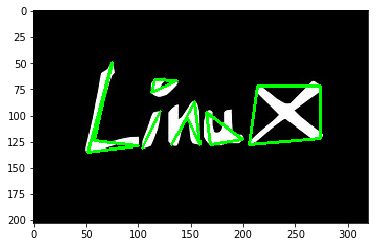

In [33]:
img = cv2.imread('img/LinuxLogo.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img2 = cv2.imread('img/LinuxLogo.jpg')
for cnt in contours:
    epsilon = 0.1*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    img2 = cv2.drawContours(img2, [approx], -1, (0,255,0), 2)

plt.imshow(img2)
plt.show()

# Hough Line Transform

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html#hough-lines

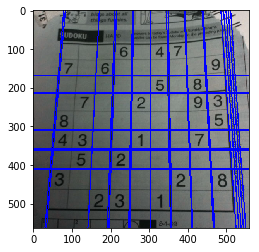

In [34]:
img = cv2.imread('img/sudoku.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(img)
plt.show()

# Hough Circle Transform

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghcircles/py_houghcircles.html#hough-circles

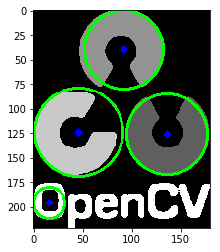

In [35]:
img = cv2.imread('img/opencv-logo-white.png',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(cimg)
plt.show()

# Image Segmentation with Watershed Algorithm

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html#watershed

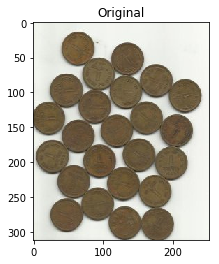

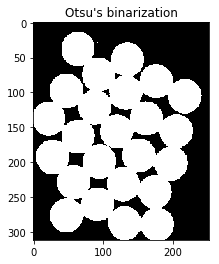

In [36]:
img = cv2.imread('img/coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2),plt.title('Original')
plt.show()

plt.imshow(thresh, cmap = 'gray'),plt.title('Otsu\'s binarization')
plt.show()

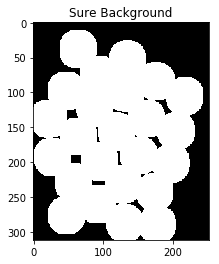

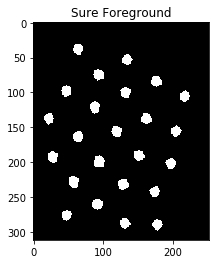

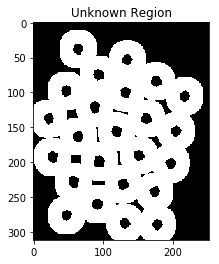

In [37]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.imshow(sure_bg, cmap = 'gray'),plt.title('Sure Background')
plt.show()
plt.imshow(sure_fg, cmap = 'gray'),plt.title('Sure Foreground')
plt.show()
plt.imshow(unknown, cmap = 'gray'),plt.title('Unknown Region')
plt.show()

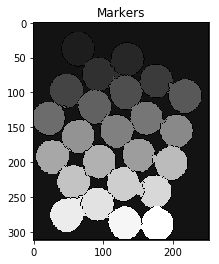

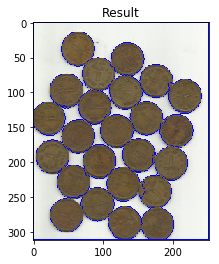

In [38]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(markers, cmap = 'gray'),plt.title('Markers')
plt.show()
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2, cmap = 'gray'),plt.title('Result')
plt.show()